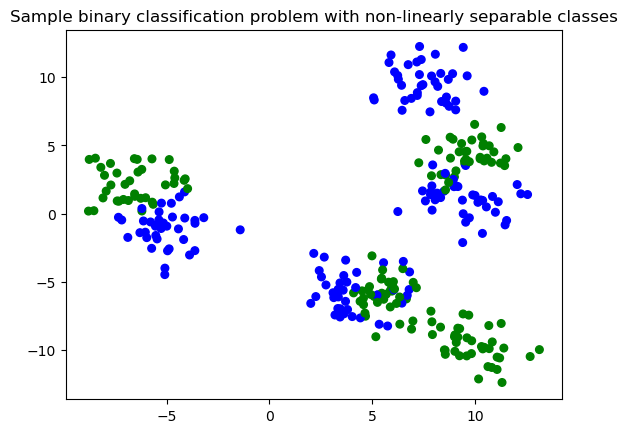

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size = 0.2,random_state=66)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_best = 0
best_accuracy = 0
for k in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      k_best = k

In [5]:
k_best = k_best # 'compute the best k'
score_best = best_accuracy #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))


The best k = 4 , score = 0.9333333333333333


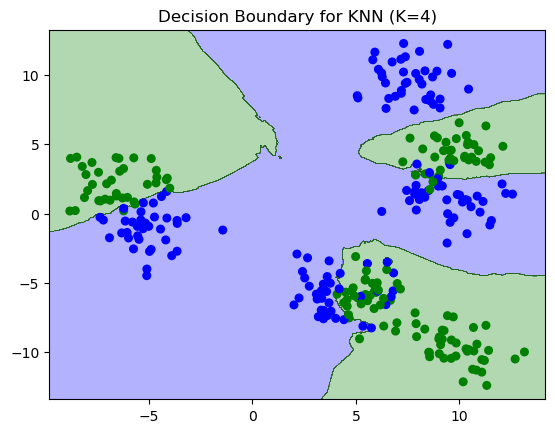

In [6]:
h = 0.02  
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.title('Decision Boundary for KNN (K={})'.format(k_best))
plt.show()